# 4.2 - Evaluación

### Regresión

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

In [2]:
data=load_diabetes()

In [3]:
X_train, X_test, y_train, y_test = tts(data.data, data.target)

In [4]:
rf=RFR()
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [5]:
y_test[:10]

array([191.,  94., 174., 141., 140., 243., 134., 172.,  88.,  87.])

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [6]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

4021.4776684684684

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [7]:
mse(y_test, y_pred, squared=False)

63.415121764989685

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [12]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred)**0.5

0.44116263303945996

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [13]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

50.103423423423415

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [14]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.34064884729049205

In [15]:
rf.score(X_test, y_test)  # R2 solo para problemas de regresion, numerico vamos

0.34064884729049205

### Clasificación

In [16]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier as RFC

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [17]:
rfc=RFC().fit(X_train, y_train)

y_pred=rfc.predict(X_test)

In [18]:
y_test[:10]

array([1, 1, 0, 0, 2, 2, 1, 2, 2, 1])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [19]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.9777777777777777

In [20]:
rfc.score(X_test, y_test)   # en clasificacion el .score() es el accuracy

0.9777777777777777

##### Precision

In [23]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='micro')

0.9777777777777777

##### Recall

In [24]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.9761904761904763

##### F1_Score

In [25]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.9786453119786453

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [26]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[13,  1,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]])

In [29]:
y_pred==y_test # busqueda de cual esta mal

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [35]:
y_pred

array([1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1,
       1])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
sum(sum(cm(y_test, y_pred)))

45

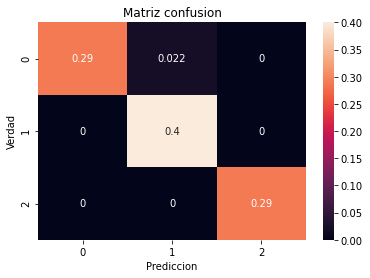

In [38]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data=load_breast_cancer()

X_train, X_test, y_train, y_test=tts(data.data, data.target)


svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test) # predice etiqueta

y_prob=svc.predict_proba(X_test)[::, 1]  # devuelve la prob

In [40]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

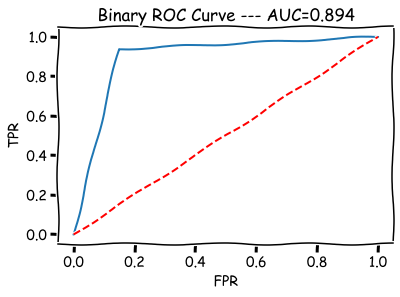

In [42]:
with plt.xkcd():  # mal pintao, y_pred
    
    fpr, tpr, umbrales=roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

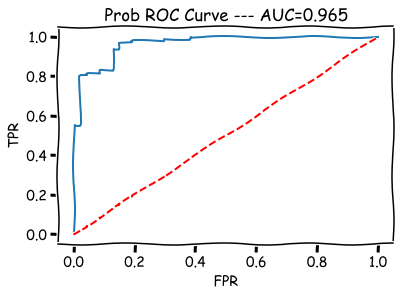

In [43]:
with plt.xkcd(): # bien pintá, y_prob, hay que sacar las probs para la curva ROC
    
    fpr, tpr, umbrales=roc(y_test, y_prob)
    a=auc(y_test, y_prob)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Prob ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

In [53]:
data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_prob=svc.predict_proba(X_test)

In [54]:
#!pip install scikit-plot

In [55]:
import scikitplot as skplt

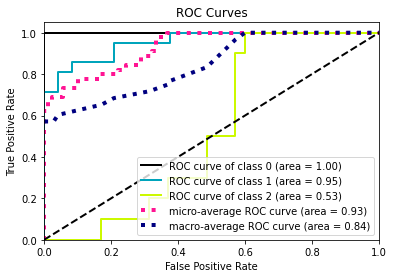

In [56]:
skplt.metrics.plot_roc(y_test, y_prob);

In [57]:
acc(y_test, y_pred)

0.8444444444444444

In [58]:
cm(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 20,  1],
       [ 0,  6,  4]])